# Importing all necessary libraries

In [2]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Imputation
from fancyimpute import IterativeImputer

# Visualize missing
import missingno as msno

# Models
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

%matplotlib inline

## Load Data

In [3]:
df_pdf = pd.read_csv('final.csv')

# Display first 5 Rows.
df_pdf.head()

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,4b65dfadb1742b415136d191973da00d,42,385,3,58,24,0,0,0,Yes,...,0,4,18,0,2,1,87,87,66,Yes
1,3dc4e0a208acbfd793d585d61e4da5cd,85,180,1,77,0,0,0,0,No,...,0,0,0,0,0,0,17,17,3,Yes
2,23e106637070d37b8d8e1b681fdb54df,37,279,6,50,12,0,0,0,Yes,...,0,16,0,0,1,0,48,49,39,No
3,928fddf2335bb4d1211357b0c5abfad8,295,311,12,349,12,0,0,0,Yes,...,0,12,1,1,1,1,172,174,414,No
4,3d95d975bb58268c5664bd05166d14db,102,180,2,24,0,0,0,-1,unclear,...,1,0,1,0,0,0,10,10,4,Yes


## Get a brief summary for our PDF dataset.

In [4]:

df_pdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210339 entries, 0 to 210338
Data columns (total 62 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   MD5                      210339 non-null  object
 1   pdfsize                  210339 non-null  int64 
 2   metadata size            210339 non-null  int64 
 3   pages                    210339 non-null  int64 
 4   xref length              210339 non-null  int64 
 5   title characters         210339 non-null  int64 
 6   isEncrypted              210339 non-null  int64 
 7   embedded files           210339 non-null  int64 
 8   images                   210339 non-null  int64 
 9   contains text            210339 non-null  object
 10  header                   210339 non-null  object
 11  obj                      210339 non-null  int64 
 12  endobj                   210339 non-null  int64 
 13  stream                   210339 non-null  int64 
 14  endstream           

In [5]:
# Check number of (Columns, Rows) in our dataset.
df_pdf.shape  #(31 features, 1 Fine Name, 1 Class -> 33)

(210339, 62)

## Check data types for our dataset

In [6]:

df_pdf.dtypes.value_counts()


int64     58
object     4
Name: count, dtype: int64

In [7]:

# Show Stats summary for our numeric/float64 columns.
df_pdf.describe()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,obj,endobj,...,/XObject,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments
count,210339.000000,210339.000000,210339.000000,2.103390e+05,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,...,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000,210339.000000
mean,371.220164,567.017120,17.145218,1.233154e+03,99.544640,0.027318,0.003884,-0.026305,274.749642,274.813544,...,30.361112,0.827265,9.998317,9.814799,0.796861,1.259348,1.016973,336.815403,338.951359,585.950304
std,903.154355,1962.466237,48.838829,1.024080e+04,1512.407406,0.163125,0.101145,0.160042,1217.304837,1218.033083,...,266.854390,23.264933,58.621815,108.552334,1.864145,2.273504,4.852558,1302.581022,1311.675151,1626.091091
min,0.000000,4.000000,0.000000,2.000000e+00,0.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,24.000000,257.000000,1.000000,3.600000e+01,0.000000,0.000000,0.000000,0.000000,26.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,33.000000,22.000000
50%,67.000000,312.000000,3.000000,6.600000e+01,15.000000,0.000000,0.000000,0.000000,55.000000,55.000000,...,1.000000,0.000000,6.000000,0.000000,1.000000,1.000000,1.000000,78.000000,78.000000,85.000000
75%,270.000000,369.000000,15.000000,2.030000e+02,36.000000,0.000000,0.000000,0.000000,141.000000,141.000000,...,5.000000,0.000000,12.000000,2.000000,1.000000,1.000000,1.000000,199.000000,200.000000,401.000000
max,50820.000000,80840.000000,2316.000000,1.179814e+06,80647.000000,1.000000,18.000000,0.000000,111656.000000,111656.000000,...,22824.000000,2749.000000,24347.000000,13204.000000,229.000000,212.000000,410.000000,124977.000000,124943.000000,87470.000000


## Check total Missing values.

In [8]:

sum(df_pdf.isnull().sum())


0

In [9]:
# Check Missing values for each column
df_pdf.isnull().sum()

MD5              0
pdfsize          0
metadata size    0
pages            0
xref length      0
                ..
/XML             0
dict_start       0
dict_end         0
comments         0
Malicious        0
Length: 62, dtype: int64

In [10]:
# Display Missing values for specific column
df_pdf[df_pdf.Malicious.isnull()]

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious


In [11]:
# Display 3 random Missing values
df_pdf[df_pdf.isnull().any(axis=1)].head(3)

,MD5,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious


## Visualize Bar chart of missing values

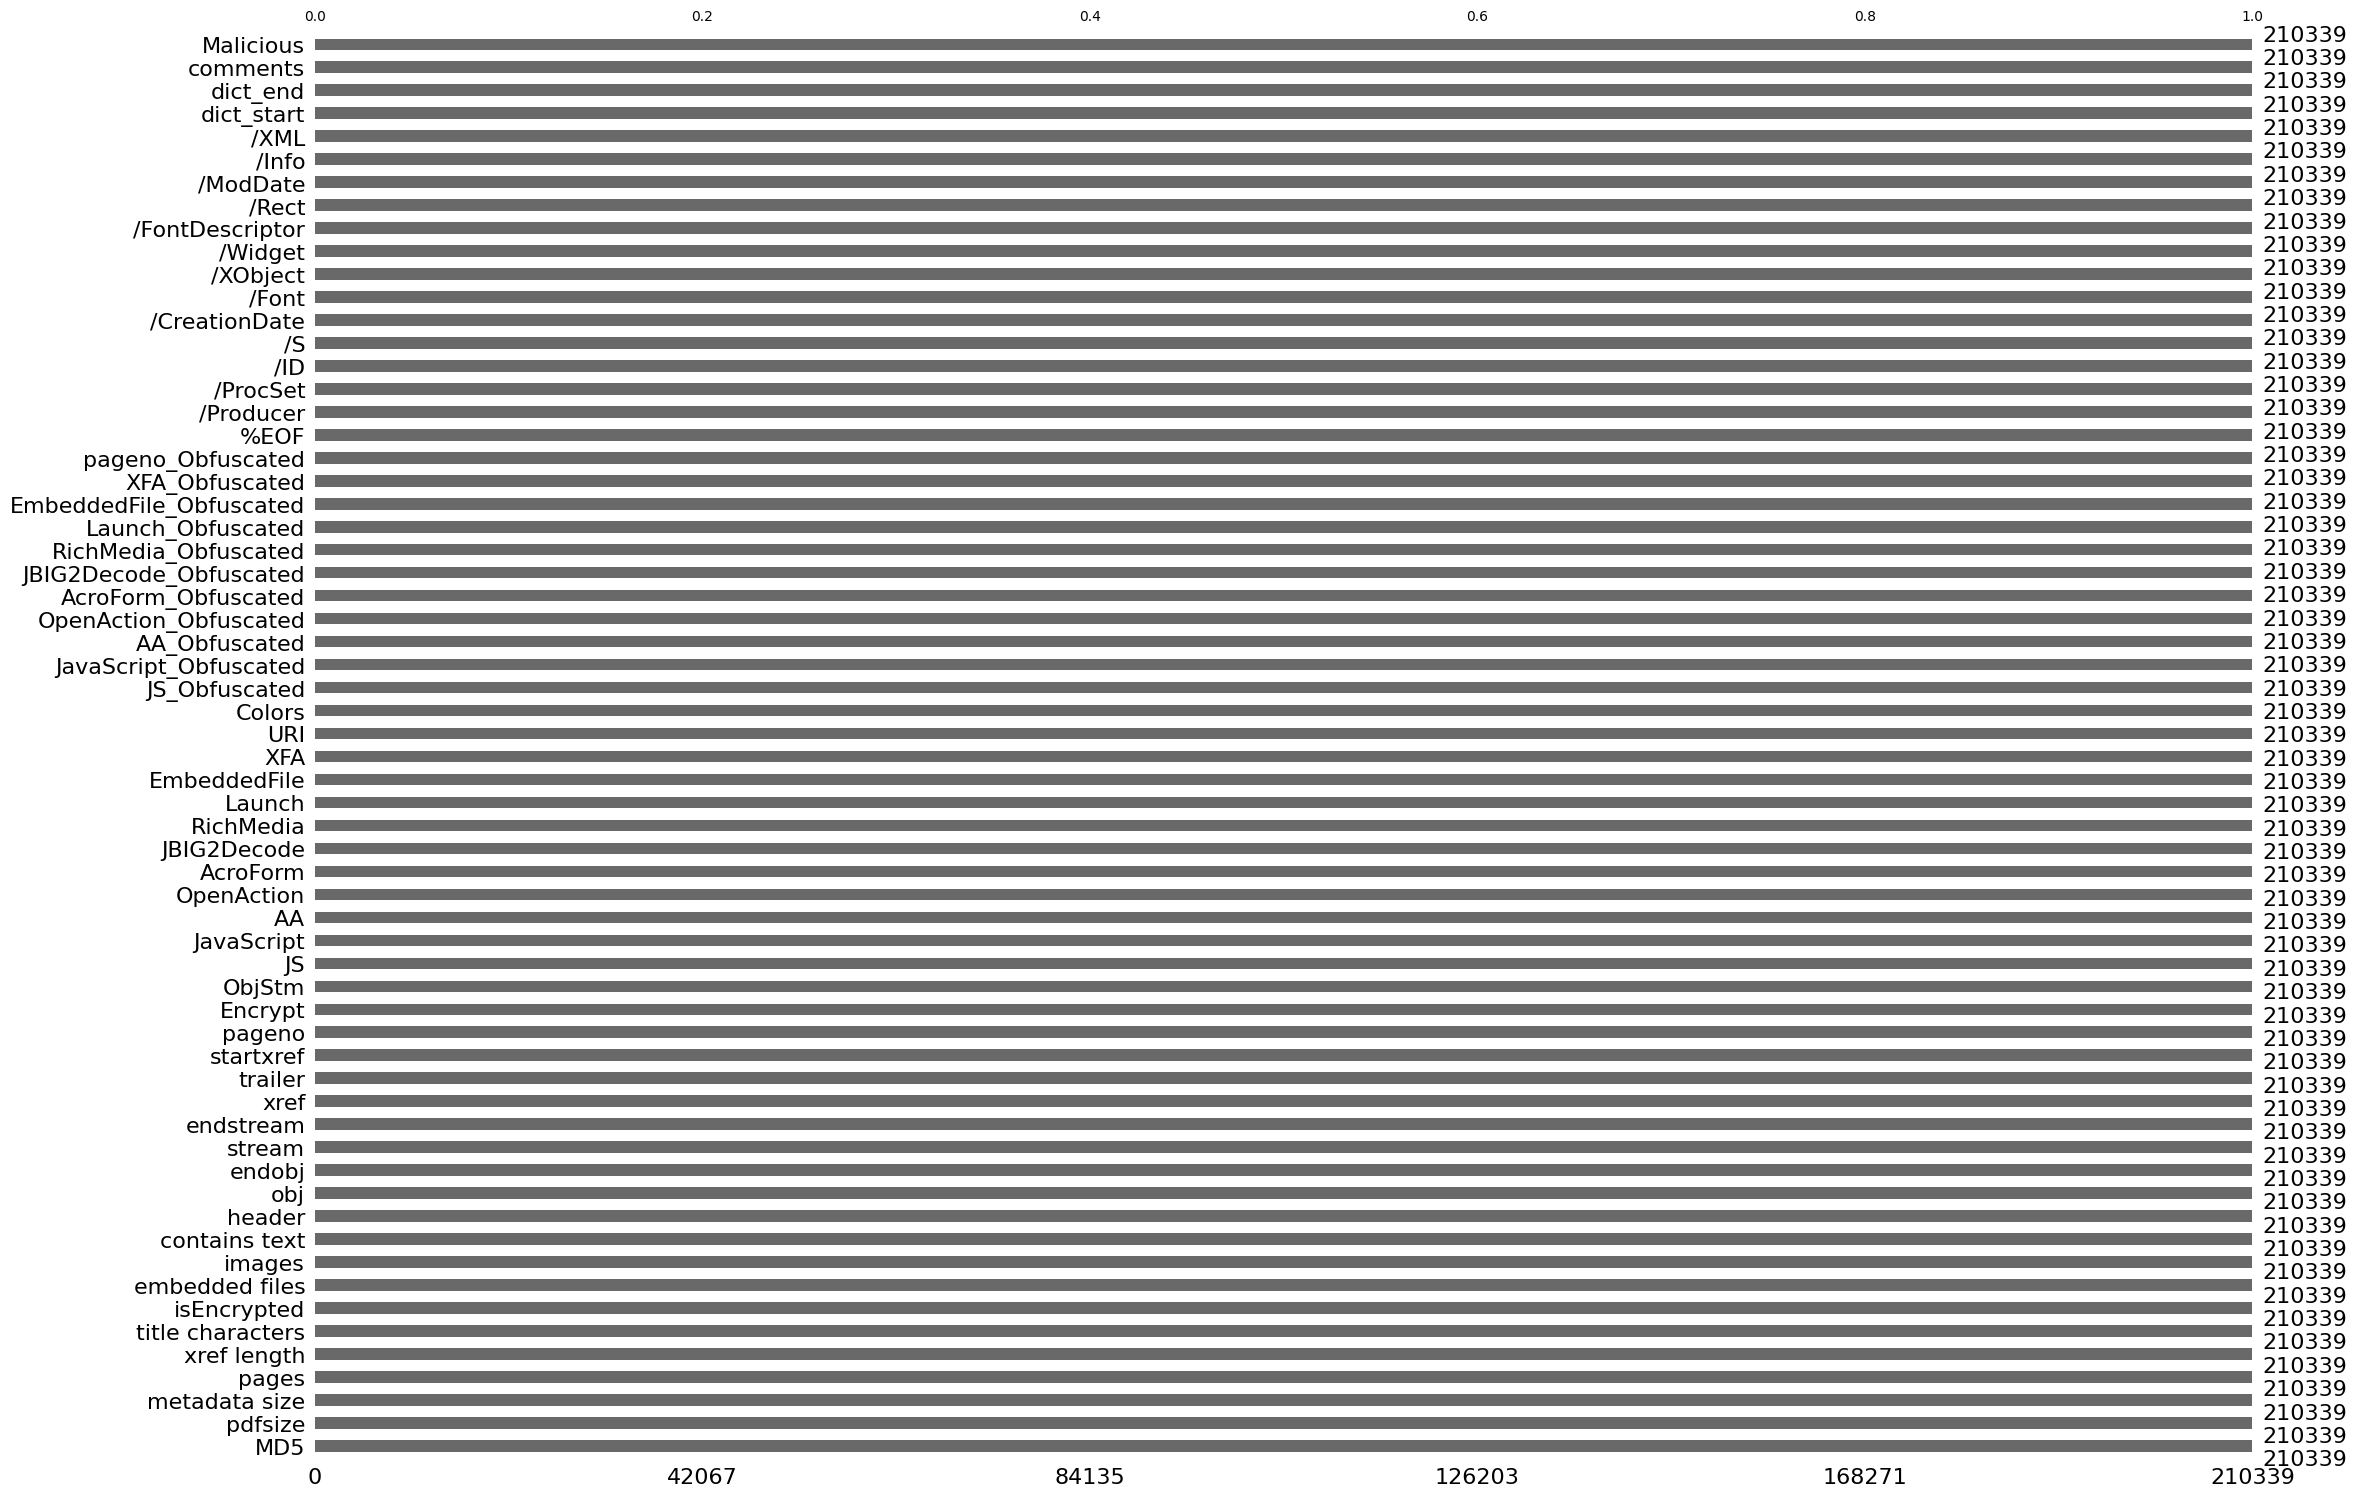

In [12]:

msno.bar(df_pdf);

In [13]:
# Check missing after applied imputation
df_pdf.isnull().sum()


MD5              0
pdfsize          0
metadata size    0
pages            0
xref length      0
                ..
/XML             0
dict_start       0
dict_end         0
comments         0
Malicious        0
Length: 62, dtype: int64

In [14]:
sum(df_pdf.isnull().sum())

0

In [15]:
# Drop Fine Name for now..
df_pdf.drop('MD5', axis = 1, inplace= True)

# Check values of each categorical column that have missing value/s


In [16]:
df_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210339 entries, 0 to 210338
Data columns (total 61 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   pdfsize                  210339 non-null  int64 
 1   metadata size            210339 non-null  int64 
 2   pages                    210339 non-null  int64 
 3   xref length              210339 non-null  int64 
 4   title characters         210339 non-null  int64 
 5   isEncrypted              210339 non-null  int64 
 6   embedded files           210339 non-null  int64 
 7   images                   210339 non-null  int64 
 8   contains text            210339 non-null  object
 9   header                   210339 non-null  object
 10  obj                      210339 non-null  int64 
 11  endobj                   210339 non-null  int64 
 12  stream                   210339 non-null  int64 
 13  endstream                210339 non-null  int64 
 14  xref                

In [17]:
# Check duplicate points in our dataset
df_pdf.duplicated().sum() # No duplicates

np.int64(117328)

In [18]:
df_pdf=df_pdf.dropna()
df_pdf.duplicated().sum() # No duplicates

np.int64(117328)

In [19]:
# Drop duplicate rows
df_pdf = df_pdf.drop_duplicates()


In [20]:
df_pdf.Malicious.value_counts()


Malicious
No     56149
Yes    36862
Name: count, dtype: int64

In [21]:
data = df_pdf.copy()
data.head()


,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,Yes,%PDF-1.4,...,0,4,18,0,2,1,87,87,66,Yes
1,85,180,1,77,0,0,0,0,No,%PDF-1.6,...,0,0,0,0,0,0,17,17,3,Yes
2,37,279,6,50,12,0,0,0,Yes,%PDF-1.2,...,0,16,0,0,1,0,48,49,39,No
3,295,311,12,349,12,0,0,0,Yes,%PDF-1.4,...,0,12,1,1,1,1,172,174,414,No
4,102,180,2,24,0,0,0,-1,unclear,%PDF-1.6,...,1,0,1,0,0,0,10,10,4,Yes


## Dropping Obfuscated Columns

In [22]:
data = data.drop(columns=[col for col in data.columns if col.endswith('_Obfuscated')])
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,Yes,%PDF-1.4,...,0,4,18,0,2,1,87,87,66,Yes
1,85,180,1,77,0,0,0,0,No,%PDF-1.6,...,0,0,0,0,0,0,17,17,3,Yes
2,37,279,6,50,12,0,0,0,Yes,%PDF-1.2,...,0,16,0,0,1,0,48,49,39,No
3,295,311,12,349,12,0,0,0,Yes,%PDF-1.4,...,0,12,1,1,1,1,172,174,414,No
4,102,180,2,24,0,0,0,-1,unclear,%PDF-1.6,...,1,0,1,0,0,0,10,10,4,Yes


## result and text mapping

In [23]:
data["contains text"].unique()

array(['Yes', 'No', 'unclear'], dtype=object)

In [24]:
# Assuming df_pdf is your DataFrame
data.iloc[:, 49] = data.iloc[:, 49].map({'Yes': 1, 'No': 0})
data.iloc[:, 8] = data.iloc[:, 8].map({'Yes': 1, 'No': 0,'unclear':2,"-1":-1,"0":-2})
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,1,%PDF-1.4,...,0,4,18,0,2,1,87,87,66,1
1,85,180,1,77,0,0,0,0,0,%PDF-1.6,...,0,0,0,0,0,0,17,17,3,1
2,37,279,6,50,12,0,0,0,1,%PDF-1.2,...,0,16,0,0,1,0,48,49,39,0
3,295,311,12,349,12,0,0,0,1,%PDF-1.4,...,0,12,1,1,1,1,172,174,414,0
4,102,180,2,24,0,0,0,-1,2,%PDF-1.6,...,1,0,1,0,0,0,10,10,4,1


## Converting header values (text to float)

In [25]:
data["header"].unique()

array(['%PDF-1.4', '%PDF-1.6', '%PDF-1.2', '%PDF-1.3', '%PDF-1.5',
       '%PDF-1.7', 'Malformed', '%PDF-1.0', '%PDF-1.1'], dtype=object)

In [26]:
original_values = np.array(['%PDF-1.0','%PDF-1.1','%PDF-1.2','%PDF-1.3','%PDF-1.4','%PDF-1.5','%PDF-1.6','%PDF-1.7','Malformed'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the original values
numeric_values = label_encoder.fit_transform(original_values)

# Create a mapping of original values to numeric values
value_mapping = {original: encoded for original, encoded in zip(original_values, numeric_values)}

# Convert the 10th column using the mapping
data.iloc[:,9] = df_pdf.iloc[:,9].map(value_mapping)

In [27]:
data.head()

,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,1,4,...,0,4,18,0,2,1,87,87,66,1
1,85,180,1,77,0,0,0,0,0,6,...,0,0,0,0,0,0,17,17,3,1
2,37,279,6,50,12,0,0,0,1,2,...,0,16,0,0,1,0,48,49,39,0
3,295,311,12,349,12,0,0,0,1,4,...,0,12,1,1,1,1,172,174,414,0
4,102,180,2,24,0,0,0,-1,2,6,...,1,0,1,0,0,0,10,10,4,1


## Converting objects to numeric values

In [28]:

# Assuming 'data' is your DataFrame
data = data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-convertible values to NaN
data.fillna(0, inplace=True)  #


data.head() # Ensure data is loaded correctly




,pdfsize,metadata size,pages,xref length,title characters,isEncrypted,embedded files,images,contains text,header,...,/Widget,/FontDescriptor,/Rect,/ModDate,/Info,/XML,dict_start,dict_end,comments,Malicious
0,42,385,3,58,24,0,0,0,1,4,...,0,4,18,0,2,1,87,87,66,1
1,85,180,1,77,0,0,0,0,0,6,...,0,0,0,0,0,0,17,17,3,1
2,37,279,6,50,12,0,0,0,1,2,...,0,16,0,0,1,0,48,49,39,0
3,295,311,12,349,12,0,0,0,1,4,...,0,12,1,1,1,1,172,174,414,0
4,102,180,2,24,0,0,0,-1,2,6,...,1,0,1,0,0,0,10,10,4,1


In [29]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93011 entries, 0 to 210332
Data columns (total 50 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   pdfsize           93011 non-null  int64
 1   metadata size     93011 non-null  int64
 2   pages             93011 non-null  int64
 3   xref length       93011 non-null  int64
 4   title characters  93011 non-null  int64
 5   isEncrypted       93011 non-null  int64
 6   embedded files    93011 non-null  int64
 7   images            93011 non-null  int64
 8   contains text     93011 non-null  int64
 9   header            93011 non-null  int64
 10  obj               93011 non-null  int64
 11  endobj            93011 non-null  int64
 12  stream            93011 non-null  int64
 13  endstream         93011 non-null  int64
 14  xref              93011 non-null  int64
 15  trailer           93011 non-null  int64
 16  startxref         93011 non-null  int64
 17  pageno            93011 non-null  i

## Dropping column 1 (index 0), column 5 (index 4), and keeping necessary columns

In [30]:
df_pdf.duplicated().sum()

np.int64(0)

In [31]:

X = data.drop(columns=[ data.columns[49]])  # Adjusted indices
y = data.iloc[:, 49]

y.info()

<class 'pandas.core.series.Series'>
Index: 93011 entries, 0 to 210332
Series name: Malicious
Non-Null Count  Dtype
--------------  -----
93011 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [32]:
# Ensure y is aligned with X
y = y.iloc[:X.shape[0]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [33]:
y_train.value_counts()

Malicious
0    44936
1    29472
Name: count, dtype: int64

# Grid Search for AdaBoost Parameters

In [34]:
# warnings.filterwarnings('ignore')

# # Define parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1.0]
# }

# # Create AdaBoost classifier
# ada = AdaBoostClassifier()

# # Perform Grid Search
# grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Print best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Test on test set
# test_score = grid_search.score(X_test, y_test)
# print("Test set score:", test_score)

# AdaBoost

c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Analysis\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


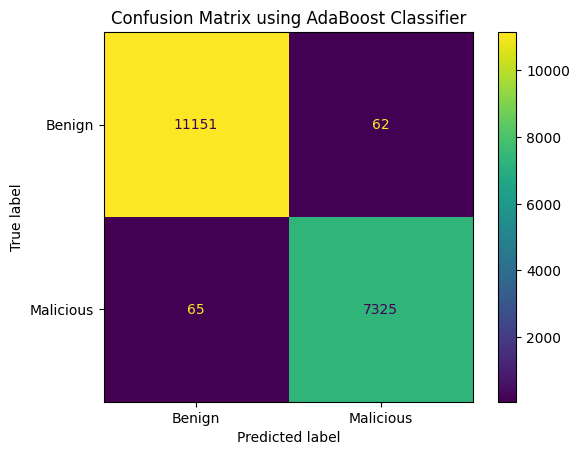

False Positive Rate: 0.005529296352448051
True Positive Rate: 0.9912043301759134
Accuracy Score: 0.9931731441165403


In [35]:
# Initialize AdaBoost Classifier
ada_boost = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state=42)

# Train the model
ada_boost.fit(X_train, y_train)

# Make Predictions
y_pred_ab = ada_boost.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ab).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_ab), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using AdaBoost Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_ab)}')


# Grid Search for RF Parameters

In [36]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create RandomForest classifier
# rf = RandomForestClassifier(random_state=42)

# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                           cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Print best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Evaluate on test set
# test_score = grid_search.score(X_test, y_test)
# print("Test set score:", test_score)


# **RandomForest**

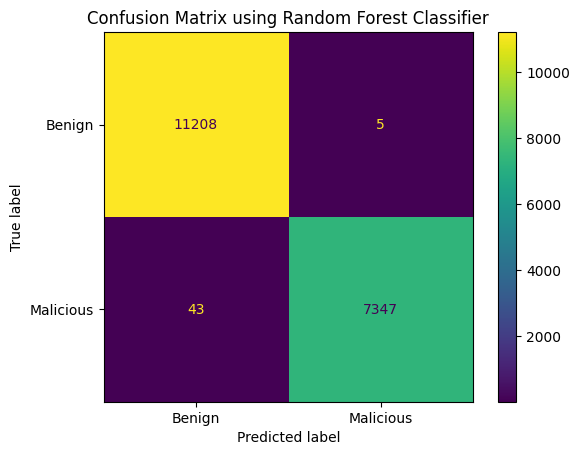

False Positive Rate: 0.00044591099616516543
True Positive Rate: 0.9941813261163734
Accuracy Score: 0.9974197710046767


In [37]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make Predictions
y_pred_rf = rf.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_rf)}')

## Feature Importance Chart

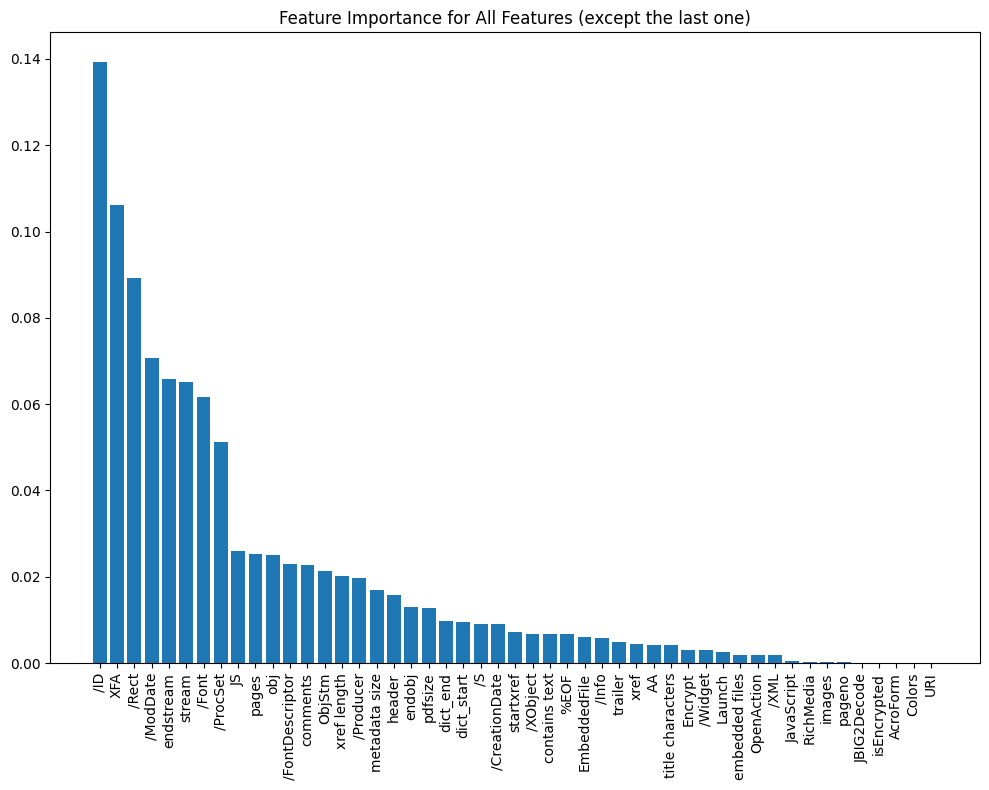

In [41]:
# Assuming your dataset is in 'df'

# Separate features (all columns except the last one) and target (the last column)
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column as the target

# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = data.columns[:-1]

# Train the Random Forest model using all features
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()



## Removing last few columns in Bar Chart above

In [39]:
X1 = data.drop(columns=[data.columns[32],data.columns[26],data.columns[24],data.columns[25],data.columns[5],data.columns[17],data.columns[30], data.columns[31]])  # Adjusted indices
y1 = data.iloc[:, 32]
X1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13207 entries, 0 to 30826
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   pdfsize           13207 non-null  int64
 1   metadata size     13207 non-null  int64
 2   pages             13207 non-null  int64
 3   xref length       13207 non-null  int64
 4   title characters  13207 non-null  int64
 5   embedded files    13207 non-null  int64
 6   images            13207 non-null  int64
 7   contains text     13207 non-null  int64
 8   header            13207 non-null  int64
 9   obj               13207 non-null  int64
 10  endobj            13207 non-null  int64
 11  stream            13207 non-null  int64
 12  endstream         13207 non-null  int64
 13  xref              13207 non-null  int64
 14  trailer           13207 non-null  int64
 15  startxref         13207 non-null  int64
 16  Encrypt           13207 non-null  int64
 17  ObjStm            13207 non-null  in

In [40]:
# Ensure y is aligned with X
y1 = y1.iloc[:X1.shape[0]]

# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)



## Re-run RandomForest

In [41]:
# Initialize Random Forest Classifier
rf1 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Train the model
rf1.fit(X_train1, y_train1)

# Make Predictions
y_pred_rf1 = rf1.predict(X_test1)

# Confusion Matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y_test1, y_pred_rf1).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test1, y_pred_rf1), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Random Forest Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp1 / (fp1 + tn1)}')
print(f'True Positive Rate: {tp1 / (tp1 + fn1)}')
print(f'Accuracy Score: {accuracy_score(y_test1, y_pred_rf1)}')

ValueError: too many values to unpack (expected 4)

## Feature Importance Chart

C:\Users\Himanshu Shekhar\AppData\Local\Temp\ipykernel_25428\1875906854.py:19: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Himanshu Shekhar\Desktop\College\3rd Year\Sem 5\CS658\CS658_Project\Model\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


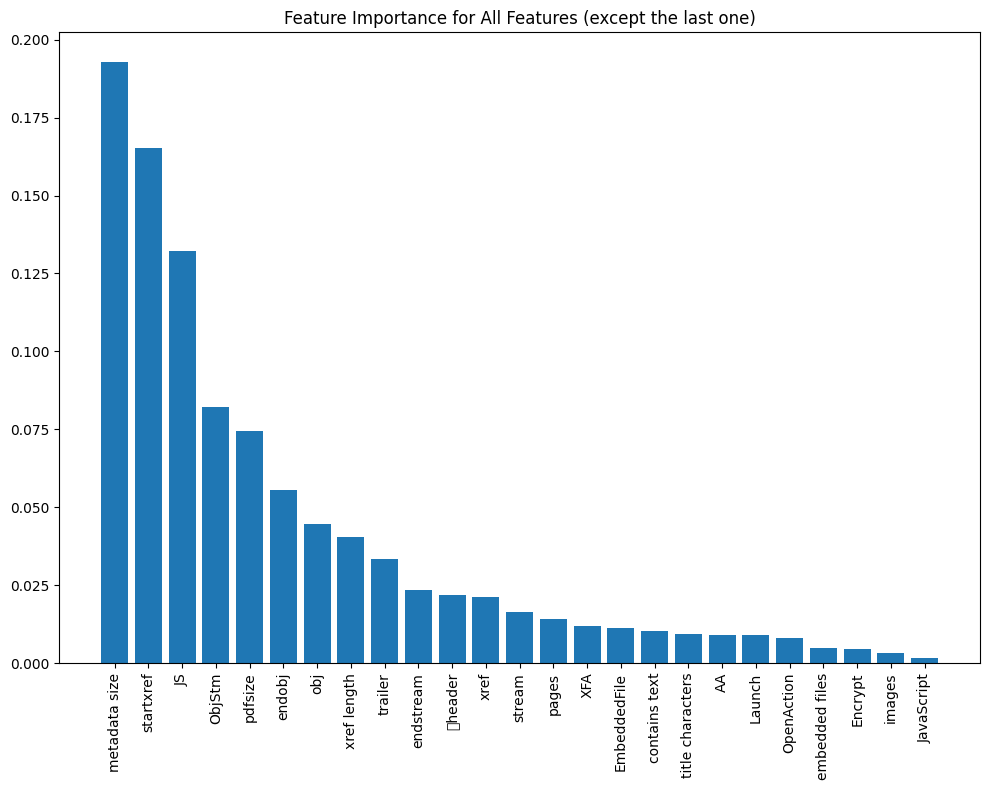

In [39]:
# If your dataframe is a pandas DataFrame, get feature names (column names except the last one)
feature_names = X1.columns[:]

# Train the Random Forest model using all features
rf1 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)
rf1.fit(X1, y1)

# Extract feature importances
importances = rf1.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importance graph
plt.figure(figsize=(10, 8))
plt.title("Feature Importance for All Features (except the last one)")
plt.bar(range(X1.shape[1]), importances[indices], align="center")
plt.xticks(range(X1.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# **ADABoost Re-run**

In [42]:
# Initialize AdaBoost Classifier
ada_boost1 = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state=42)

# Train the model
ada_boost1.fit(X_train1, y_train1)

# Make Predictions
y_pred_ab1 = ada_boost1.predict(X_test1)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test1, y_pred_ab1).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test1, y_pred_ab1), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using AdaBoost Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test1, y_pred_ab1)}')


ValueError: too many values to unpack (expected 4)

# Grid Search for MLP Parameters

In [41]:
# # Define parameter grid
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50,50), (100,100)],
#     'activation': ['relu', 'tanh'],
#     'learning_rate_init': [0.001, 0.01],
#     'max_iter': [1000]
# }

# # Initialize MLPClassifier
# mlp = MLPClassifier()

# # Perform GridSearchCV
# grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Print best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

# # Test best model
# best_model = grid_search.best_estimator_
# test_score = best_model.score(X_test, y_test)
# print("Test set score:", test_score)

# **MLP**

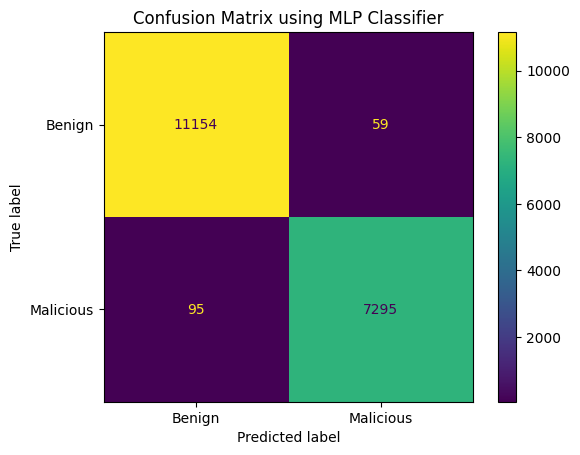

False Positive Rate: 0.005261749754748952
True Positive Rate: 0.9871447902571042
Accuracy Score: 0.991721765306671


In [38]:
# Initialize MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='tanh', learning_rate_init=0.001, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make Predictions
y_pred_mlp = mlp.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_mlp).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_mlp), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using MLP Classifier')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_mlp)}')


# **Stacking Classifier**

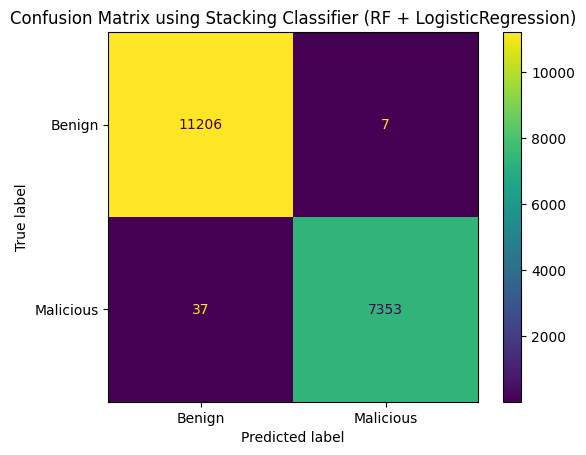

False Positive Rate: 0.0006242753946312316
True Positive Rate: 0.9949932341001353
Accuracy Score: 0.9976347900876202


In [39]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Initialize Random Forest Classifier as the base model
rf_base = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Meta Learner: Logistic Regression
logistic_meta = LogisticRegression(random_state=42)

# Create Stacking Classifier using RandomForest as base model and LogisticRegression as meta learner
stacking_model = StackingClassifier(
    estimators=[('rf', rf_base)],  # Base model (RandomForest)
    final_estimator=logistic_meta,  # Meta learner (LogisticRegression)
    cv=5  # Cross-validation for robustness
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stacking).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Stacking Classifier (RF + LogisticRegression)')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_stacking)}')


# **MLP and RandomForest as Base learner**

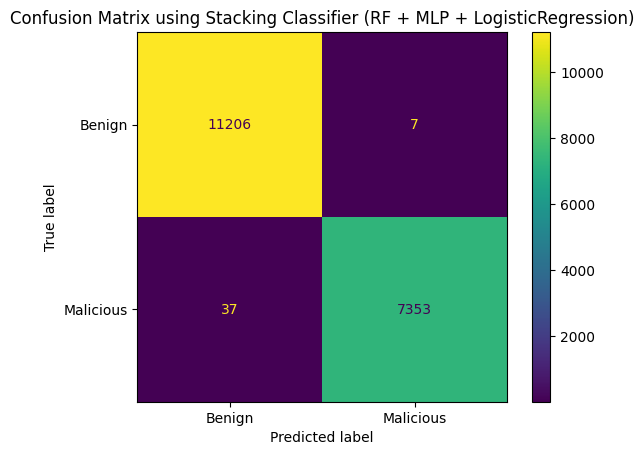

False Positive Rate: 0.0006242753946312316
True Positive Rate: 0.9949932341001353
Accuracy Score: 0.9976347900876202


In [40]:
# Assuming X_train, X_test, y_train, y_test are already defined
# Initialize Random Forest Classifier as one of the base models
rf_base = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Initialize MLP Classifier as another base model
mlp_base = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='tanh', learning_rate_init=0.001, random_state=42)

# Meta Learner: Logistic Regression
logistic_meta = LogisticRegression(random_state=42)

# Create Stacking Classifier using RandomForest and MLP as base models and LogisticRegression as meta learner
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_base),  # Random Forest base model
        ('mlp', mlp_base)  # MLP base model
    ],
    final_estimator=logistic_meta,  # Meta learner (LogisticRegression)
    cv=5  # Cross-validation for robustness
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stacking).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Stacking Classifier (RF + MLP + LogisticRegression)')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_stacking)}')


# Grid Search for SVM Parameters

In [41]:
# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['rbf', 'linear'],
#     'gamma': ['scale', 'auto', 0.1, 0.01]
# } 

# # Create SVM classifier with grid search
# svm = GridSearchCV(
#     SVC(random_state=42),
#     param_grid,
#     cv=5,
#     n_jobs=-1,
#     verbose=1
# )

# # Train the model
# svm.fit(X_train_scaled, y_train)

# # Make predictions
# y_pred = svm.predict(X_test_scaled)

# # Print results
# print(f"Best parameters: {svm.best_params_}")
# print(f"Best cross-validation accuracy: {svm.best_score_:.4f}")
# print(f"Test accuracy: {accuracy_score(y_test, y_pred):.4f}")

# SVM

Test accuracy: 0.9941


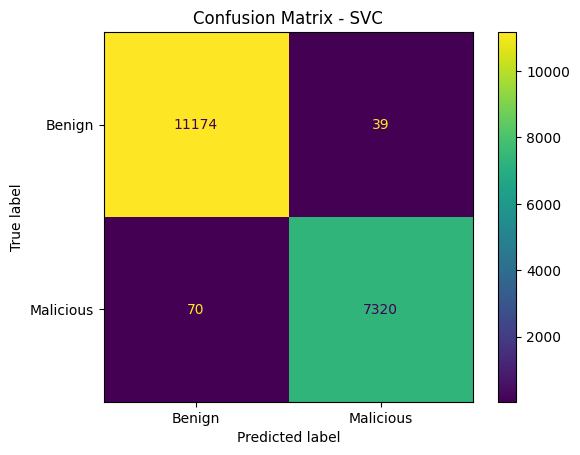

False Positive Rate: 0.0034781057700882904
True Positive Rate: 0.9905277401894452


In [42]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM classifier with best parameters found from grid search
svc = SVC(C=100, kernel='rbf', gamma='scale', random_state=42)

# Train the model
svc.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svc.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

# Create confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
disp.plot()
plt.title('Confusion Matrix - SVC')
plt.show()

# Calculate and print additional metrics
tn, fp, fn, tp = cm.ravel()
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')

# MLP, RandomForest and SVM as Base learner

In [43]:
import GPUtil
GPUtil.getAvailable()

[0]

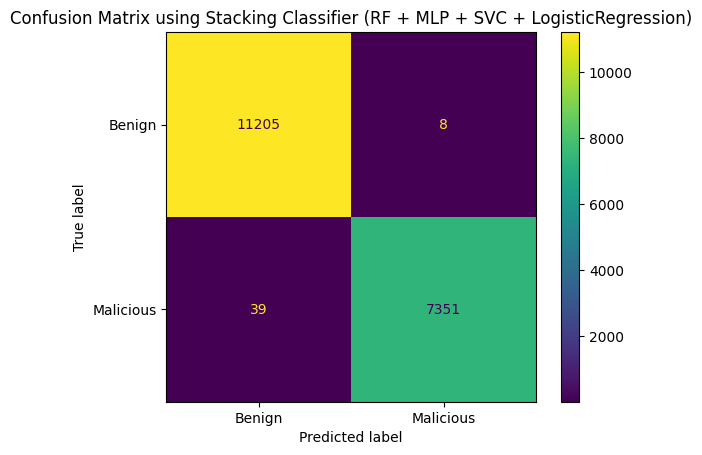

False Positive Rate: 0.0007134575938642646
True Positive Rate: 0.9947225981055481
Accuracy Score: 0.9974735257754126


In [44]:
# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize Random Forest Classifier as one of the base models
rf_base = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Initialize MLP Classifier as another base model
mlp_base = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='tanh', learning_rate_init=0.001, random_state=42)

# Initialize SVM as another base model
svc_base = SVC(C=100, kernel='rbf', gamma='scale', probability=True, random_state=42)

# Meta Learner: Logistic Regression
logistic_meta = LogisticRegression(random_state=42)

# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Stacking Classifier using RandomForest, MLP, and SVC as base models and LogisticRegression as meta learner
stacking_model = StackingClassifier(
    estimators=[
        ('rf', rf_base),  # Random Forest base model
        ('mlp', mlp_base),  # MLP base model
        ('svc', svc_base)  # SVM base model
    ],
    final_estimator=logistic_meta,  # Meta learner (LogisticRegression)
    cv=5  # Cross-validation for robustness
)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stacking).ravel()
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), display_labels=['Benign', 'Malicious']).plot()
plt.title('Confusion Matrix using Stacking Classifier (RF + MLP + SVC + LogisticRegression)')
plt.show()

# Print Performance Metrics
print(f'False Positive Rate: {fp / (fp + tn)}')
print(f'True Positive Rate: {tp / (tp + fn)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_stacking)}')

# import torch
# from sklearnex import patch_sklearn  # Intel extension for sklearn GPU acceleration
# patch_sklearn()  # This patches sklearn to use GPU where possible

# # Check if CUDA is available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(f"Using device: {device}")

# # Initialize Random Forest Classifier (GPU-accelerated through sklearn-intelex)
# rf_base = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1, 
#                                min_samples_split=2, random_state=42)

# # Initialize PyTorch-based MLP Classifier (GPU-accelerated)
# class PyTorchMLP(torch.nn.Module):
#     def __init__(self):
#         super(PyTorchMLP, self).__init__()
#         self.layers = torch.nn.Sequential(
#             torch.nn.Linear(X_train.shape[1], 100),
#             torch.nn.Tanh(),
#             torch.nn.Linear(100, 2)
#         )
        
#     def forward(self, x):
#         return self.layers(x)

# class MLPClassifierGPU:
#     def __init__(self, max_iter=1000, learning_rate=0.001):
#         self.max_iter = max_iter
#         self.learning_rate = learning_rate
#         self.model = PyTorchMLP().to(device)
#         self.optimizer = torch.optim.Adam(self.model.parameters(), lr=learning_rate)
#         self.criterion = torch.nn.CrossEntropyLoss()
        
#     def fit(self, X, y):
#         X_tensor = torch.FloatTensor(X).to(device)
#         y_tensor = torch.LongTensor(y).to(device)
        
#         for _ in range(self.max_iter):
#             self.optimizer.zero_grad()
#             output = self.model(X_tensor)
#             loss = self.criterion(output, y_tensor)
#             loss.backward()
#             self.optimizer.step()
            
#     def predict_proba(self, X):
#         self.model.eval()
#         with torch.no_grad():
#             X_tensor = torch.FloatTensor(X).to(device)
#             output = torch.softmax(self.model(X_tensor), dim=1)
#         return output.cpu().numpy()
    
#     def predict(self, X):
#         proba = self.predict_proba(X)
#         return np.argmax(proba, axis=1)

# # Initialize GPU-accelerated MLP
# mlp_base = MLPClassifierGPU(max_iter=1000, learning_rate=0.001)

# # Initialize SVM (GPU-accelerated through sklearn-intelex)
# svc_base = SVC(C=100, kernel='rbf', gamma='scale', probability=True, random_state=42)

# # Meta Learner: Logistic Regression (GPU-accelerated through sklearn-intelex)
# logistic_meta = LogisticRegression(random_state=42)

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Create Stacking Classifier
# stacking_model = StackingClassifier(
#     estimators=[
#         ('rf', rf_base),
#         ('mlp', mlp_base),
#         ('svc', svc_base)
#     ],
#     final_estimator=logistic_meta,
#     cv=5
# )

# # Train the stacking model
# stacking_model.fit(X_train_scaled, y_train)

# # Make predictions
# y_pred_stacking = stacking_model.predict(X_test_scaled)

# # Confusion Matrix
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stacking).ravel()
# ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking), 
#                       display_labels=['Benign', 'Malicious']).plot()
# plt.title('Confusion Matrix using GPU-accelerated Stacking Classifier')
# plt.show()

# # Print Performance Metrics
# print(f'False Positive Rate: {fp / (fp + tn)}')
# print(f'True Positive Rate: {tp / (tp + fn)}')
# print(f'Accuracy Score: {accuracy_score(y_test, y_pred_stacking)}')


In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from boruta import BorutaPy
import shap

def analyze_feature_importance(X, y, n_features=10):
    """
    Analyze feature importance using multiple methods and return top features.
    
    Parameters:
    X : pandas DataFrame of features
    y : target variable
    n_features : number of top features to return
    
    Returns:
    dict : Dictionary containing results from different methods
    """
    results = {}
    
    # 1. Random Forest Feature Importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    rf_importance = pd.DataFrame({
        'feature': data.columns[:-1],
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    results['random_forest'] = rf_importance.head(n_features)
    
    # 2. Statistical Tests (ANOVA F-test)
    selector = SelectKBest(score_func=f_classif, k=n_features)
    selector.fit(X, y)
    f_scores = pd.DataFrame({
        'feature': data.columns[:-1],
        'f_score': selector.scores_
    }).sort_values('f_score', ascending=False)
    results['f_test'] = f_scores.head(n_features)
    
    # 3. Mutual Information
    mi_scores = mutual_info_classif(X, y)
    mi_results = pd.DataFrame({
        'feature': data.columns[:-1],
        'mi_score': mi_scores
    }).sort_values('mi_score', ascending=False)
    results['mutual_info'] = mi_results.head(n_features)
    
    # 4. Boruta Feature Selection
    rf_boruta = RandomForestClassifier(n_estimators=100, random_state=42)
    boruta = BorutaPy(rf_boruta, n_estimators='auto', verbose=0, random_state=42)
    boruta.fit(X.values, y)
    boruta_results = pd.DataFrame({
        'feature': data.columns[:-1],
        'selected': boruta.support_,
        'rank': boruta.ranking_
    }).sort_values('rank')
    results['boruta'] = boruta_results[boruta_results.selected].head(n_features)
    
    # # 5. SHAP Values
    # explainer = shap.TreeExplainer(rf)
    # shap_values = explainer.shap_values(X)
    # if isinstance(shap_values, list):  # For classification with multiple classes
    #     shap_values = np.abs(shap_values).mean(axis=0)
    # else:
    #     shap_values = np.abs(shap_values).mean(axis=0)
    
    # shap_results = pd.DataFrame({
    #     'feature': data.columns[:-1],
    #     'shap_value': shap_values
    # }).sort_values('shap_value', ascending=False)
    # results['shap'] = shap_results.head(n_features)
    
    return results

def get_consensus_features(results, min_methods=3):
    """
    Get features that appear in multiple methods' top results.
    
    Parameters:
    results : dict of results from analyze_feature_importance
    min_methods : minimum number of methods a feature must appear in
    
    Returns:
    list : Features that appear in at least min_methods different methods
    """
    feature_counts = {}
    for method, df in results.items():
        features = df['feature'].tolist()
        for feature in features:
            feature_counts[feature] = feature_counts.get(feature, 0) + 1
    
    consensus_features = [
        feature for feature, count in feature_counts.items() 
        if count >= min_methods
    ]
    return consensus_features

# Example usage:

# Assuming you have your data in X (features) and y (target):
results = analyze_feature_importance(X, y, n_features=25)
consensus_features = get_consensus_features(results, min_methods=3)

# Print results from each method
for method, df in results.items():

    print(f"\n{method.upper()} Top Features:")
    print(df)

print("\nConsensus Features (appearing in at least 3 methods):")
print(consensus_features)


ModuleNotFoundError: No module named 'boruta'

In [60]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_feature_importance(X, y, n_features=20):
    """
    Analyze feature importance using multiple methods.
    
    Parameters:
    X : pandas DataFrame
        Feature dataset
    y : pandas Series
        Target variable (binary classification)
    n_features : int
        Number of top features to display
        
    Returns:
    dict : Dictionary containing importance scores from different methods
    """
    results = {}
    
    # 1. Random Forest Importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    rf_importance = pd.Series(rf.feature_importances_, index=data.columns[:-1])
    results['random_forest'] = rf_importance
    
    # 2. Gradient Boosting Importance
    gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb.fit(X, y)
    gb_importance = pd.Series(gb.feature_importances_, index=data.columns[:-1])
    results['gradient_boosting'] = gb_importance
    
    # 3. Mutual Information
    mi_importance = pd.Series(mutual_info_classif(X, y, random_state=42), index=data.columns[:-1])
    results['mutual_info'] = mi_importance
    
    # 4. Chi-Square Test (requires non-negative values)
    # Scale features to be non-negative for chi-square test
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    chi_scores, _ = chi2(X_scaled, y)
    chi_importance = pd.Series(chi_scores, index=data.columns[:-1])
    results['chi_square'] = chi_importance
    
    # 5. ANOVA F-value
    f_scores, _ = f_classif(X, y)
    f_importance = pd.Series(f_scores, index=data.columns[:-1])
    results['f_score'] = f_importance
    
    return results

def plot_feature_importance(importance_dict, n_features=20, figsize=(15, 10)):
    """
    Plot feature importance from different methods.
    
    Parameters:
    importance_dict : dict
        Dictionary containing importance scores from different methods
    n_features : int
        Number of top features to display
    figsize : tuple
        Figure size
    """
    # Create subplots for each method
    fig, axes = plt.subplots(len(importance_dict), 1, figsize=figsize)
    fig.suptitle('Feature Importance Analysis using Different Methods', fontsize=16)
    
    for i, (method, scores) in enumerate(importance_dict.items()):
        # Sort and get top features
        top_features = scores.sort_values(ascending=True)[-n_features:]
        
        # Create horizontal bar plot
        ax = axes[i]
        top_features.plot(kind='barh', ax=ax)
        ax.set_title(f'{method.replace("_", " ").title()} Feature Importance')
        ax.set_xlabel('Importance Score')
        
    plt.tight_layout()
    return fig

def get_consensus_ranking(importance_dict, n_features=20):
    """
    Get consensus feature ranking by averaging normalized ranks across methods.
    
    Parameters:
    importance_dict : dict
        Dictionary containing importance scores from different methods
    n_features : int
        Number of top features to display
        
    Returns:
    pandas Series : Consensus ranking of features
    """
    rankings = pd.DataFrame()
    
    # Get rankings from each method
    for method, scores in importance_dict.items():
        rankings[method] = scores.rank(ascending=False)
    
    # Calculate average ranking
    avg_ranking = rankings.mean(axis=1)
    
    return avg_ranking.sort_values()[:n_features]

# Example usage
def analyze_pdf_features(X, y, n_features=15):
    """
    Analyze PDF features importance and create visualizations.
    
    Parameters:
    X : pandas DataFrame
        PDF features dataset
    y : pandas Series
        Target variable (e.g., malicious=1, benign=0)
    n_features : int
        Number of top features to display
    """
    # Calculate importance using different methods
    importance_results = analyze_feature_importance(X, y, n_features)
    
    # Plot importance scores
    fig = plot_feature_importance(importance_results, n_features)
    
    # Get consensus ranking
    consensus = get_consensus_ranking(importance_results, n_features)
    
    # Print consensus top features
    print("\nTop Features by Consensus Ranking:")
    for i, (feature, rank) in enumerate(consensus.items(), 1):
        print(f"{i}. {feature} (Average Rank: {rank:.2f})")
    
    return importance_results, consensus, fig




In [69]:
y.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [67]:
y.shape()

TypeError: 'tuple' object is not callable

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import shap

# Load PDF malware dataset


# Split into features and labels
X = data.drop('Malicious', axis=1)
y = data['Malicious']

# 1. Random Forest Feature Importances
rf = RandomForestClassifier()
rf.fit(X, y)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Random Forest Feature Importances:\n", rf_importances.head(5))

# 2. Mutual Information
mutual_info = mutual_info_classif(X, y)
mi_importances = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print("\nMutual Information:\n", mi_importances.head(5))


# 4. Permutation Importance
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X, y)
perm_importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
print("\nPermutation Importance:\n", perm_importances.head(5))

# 5. Recursive Feature Elimination
from sklearn.feature_selection import RFE
rfe = RFE(rf, n_features_to_select=5)
rfe.fit(X, y)
rfe_importances = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print("\nRecursive Feature Elimination:\n", rfe_importances.head(5))

Random Forest Feature Importances:
 ObjStm           0.158570
JS               0.127928
metadata size    0.076523
startxref        0.060213
/ProcSet         0.057303
dtype: float64

Mutual Information:
 metadata size    0.385935
ObjStm           0.361423
xref length      0.360105
JS               0.359578
obj              0.332547
dtype: float64


ValueError: Length of values (2) does not match length of index (49)

In [36]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


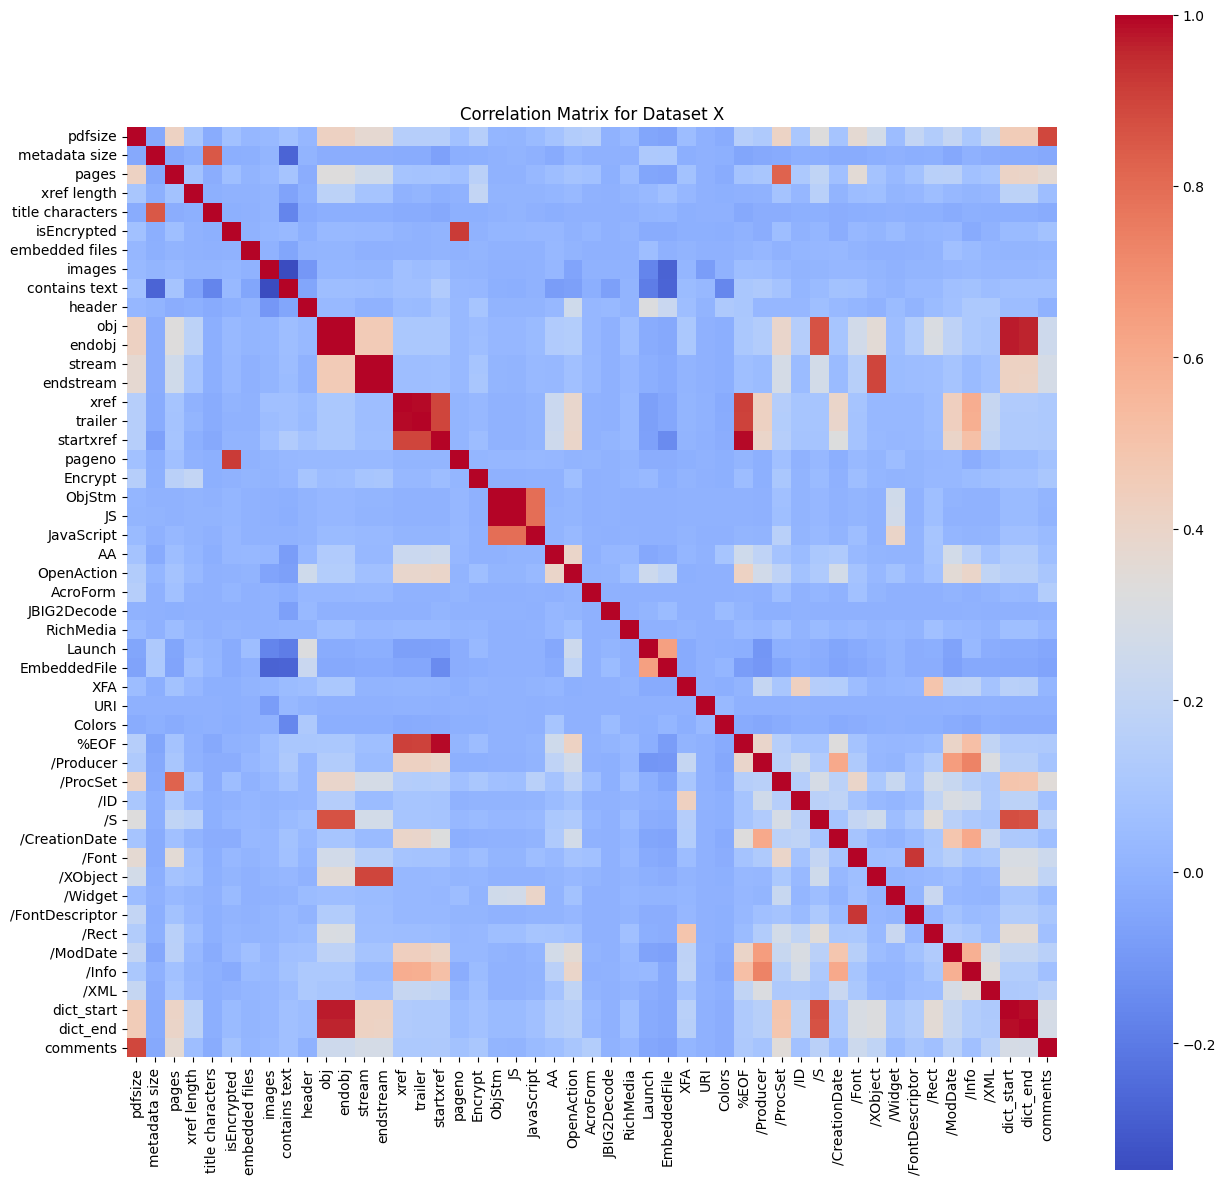

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is your DataFrame with 49 features
# Generate a random dataset for demonstration
# X = pd.DataFrame(np.random.rand(100, 49), columns=[f"Feature_{i}" for i in range(1, 50)])

# Calculate the correlation matrix
corr_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)

# Display the plot
plt.title("Correlation Matrix for Dataset X")
plt.show()


In [ ]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor

# Assuming 'X' is your dataset and 'y' are the labels
# Also, 'model' is a trained Random Forest model on this dataset

# Example: Train a random forest model for demonstration
# model = RandomForestClassifier()
# model.fit(X, y)

# Initialize the SHAP explainer with the model and data
explainer = shap.KernelExplainer(stacking_model.predict_proba, X_train[:100])  # Using a subset of training data for computational efficiency
shap_values = explainer.shap_values(X_test[:100])  # You can adjust the sample size based on your computational resources

# Plot summary plot for SHAP values (for classification, use shap_values[1] to get SHAP values for the positive class)
# shap.summary_plot(shap_values, X, plot_type="bar")



 55%|█████▌    | 55/100 [3:28:19<45:52, 61.17s/it]     

In [41]:
shap_values.shape

(93011, 49, 2)

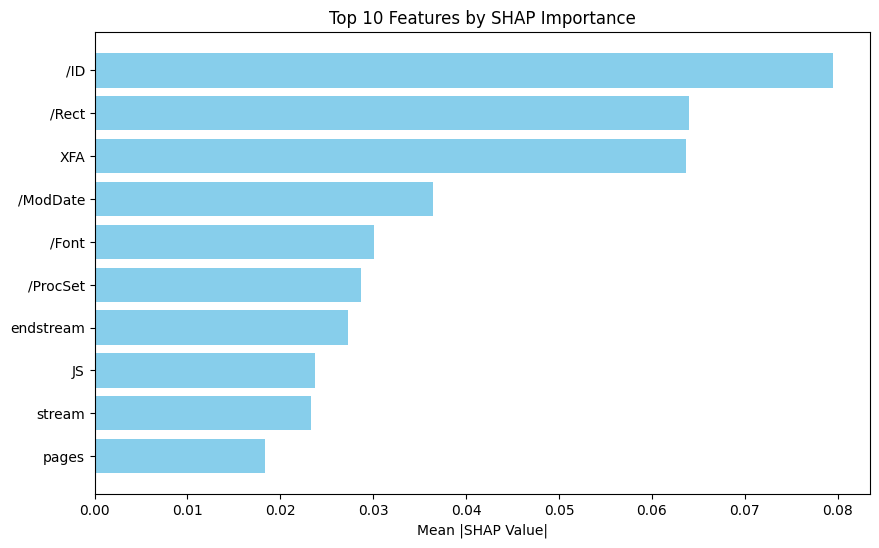

In [42]:
mean_abs_shap_values = np.abs(shap_values).mean(axis=0).mean(axis=1)

# Create a DataFrame for the mean SHAP values and feature names
shap_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean |SHAP Value|': mean_abs_shap_values
})

# Sort the DataFrame by mean absolute SHAP value in descending order
shap_importance_df = shap_importance_df.sort_values(by="Mean |SHAP Value|", ascending=False)

# Select the top N features, e.g., top 10
top_n = 10
top_features = shap_importance_df.head(top_n)

# Plot the top features by SHAP importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Mean |SHAP Value|'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Mean |SHAP Value|')
plt.title(f'Top {top_n} Features by SHAP Importance')
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import shap

def evaluate_random_forest(X, y, n_top_features):
    top_features_list = shap_importance_df.head(n_top_features)['Feature'].values

    # Step 5: Filter dataset by top features
    X_top = X[top_features_list]

    # Step 6: Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

    # Step 7: Train the Random Forest model on top features
    model.fit(X_train, y_train)

    # Step 8: Make predictions and evaluate performance
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Return results
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Example usage:
results = evaluate_random_forest(X, y, n_top_features=10)
print(results)


{'Accuracy': 0.9953770068807339, 'Precision': 0.9957431392084051, 'Recall': 0.9925966052726616, 'F1 Score': 0.9941673825564046}


In [44]:
results = evaluate_random_forest(X, y, n_top_features=15)
print(results)


{'Accuracy': 0.9964162844036697, 'Precision': 0.9972816237767307, 'Recall': 0.9936800288912965, 'F1 Score': 0.995477568740955}


In [45]:
results = evaluate_random_forest(X, y, n_top_features=20)
print(results)


{'Accuracy': 0.9969896788990825, 'Precision': 0.9989106753812637, 'Recall': 0.9934994582881906, 'F1 Score': 0.9961977186311788}


In [46]:
results = evaluate_random_forest(X, y, n_top_features=25)
print(results)


{'Accuracy': 0.9968463302752294, 'Precision': 0.9984576301941571, 'Recall': 0.9935897435897436, 'F1 Score': 0.9960177391619152}


In [47]:
results = evaluate_random_forest(X, y, n_top_features=5)
print(results)


{'Accuracy': 0.9818663990825688, 'Precision': 0.9818563092633115, 'Recall': 0.9722824124232575, 'F1 Score': 0.9770459081836327}


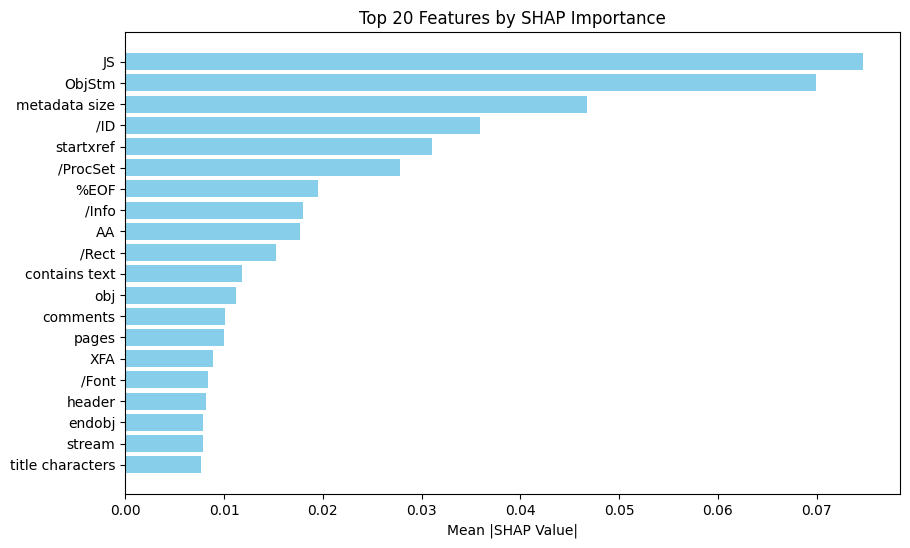

In [65]:
top_n = 20
top_features = shap_importance_df.head(top_n)

# Plot the top features by SHAP importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Mean |SHAP Value|'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Mean |SHAP Value|')
plt.title(f'Top {top_n} Features by SHAP Importance')
plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming 'X' is your full dataset and 'y' are the labels

# Step 1: Select top N features based on SHAP importance
top_n = 10  # Adjust this as needed
top_features_list = top_features['Feature'].values  # Assuming 'top_features' is defined as above
X_top = X[top_features_list]  # Select only top N features

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Step 3: Train the Random Forest model on top features
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate performance
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' for multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Display results
print("Performance Metrics Using Top Features:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Performance Metrics Using Top Features:
Accuracy:  0.9934
Precision: 0.9984
Recall:    0.9817
F1 Score:  0.9900


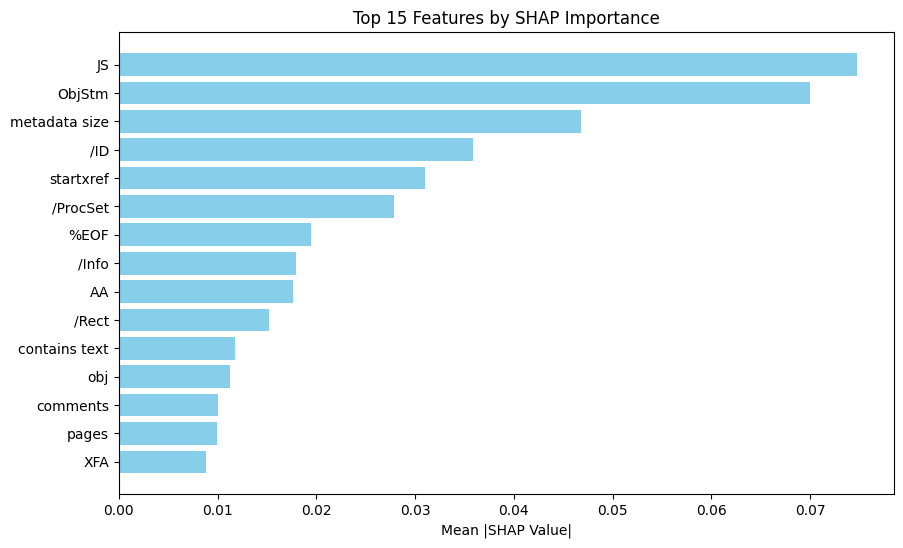

In [66]:
top_n = 15
top_features = shap_importance_df.head(top_n)

# Plot the top features by SHAP importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Mean |SHAP Value|'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Mean |SHAP Value|')
plt.title(f'Top {top_n} Features by SHAP Importance')
plt.show()

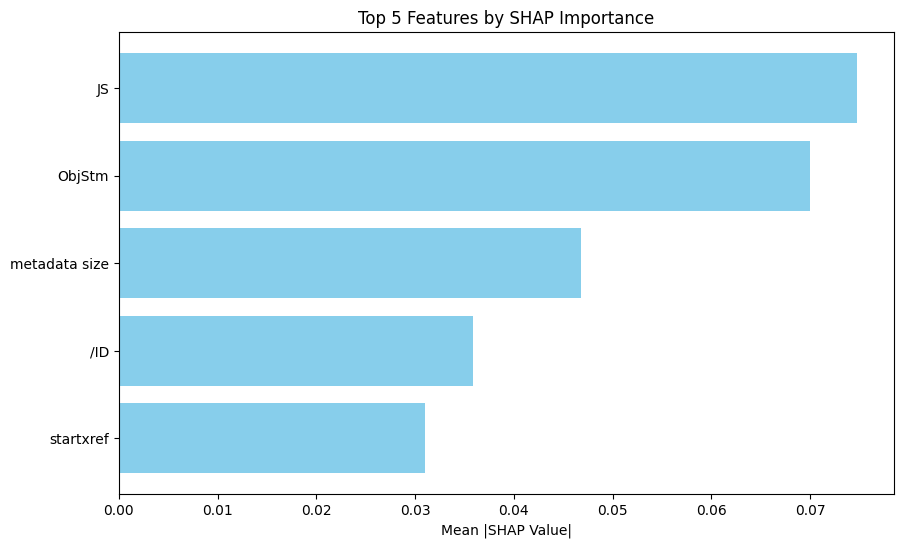

In [67]:
top_n = 5
top_features = shap_importance_df.head(top_n)

# Plot the top features by SHAP importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Mean |SHAP Value|'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Mean |SHAP Value|')
plt.title(f'Top {top_n} Features by SHAP Importance')
plt.show()

In [2]:
top_n = 25
top_features = shap_importance_df.head(top_n)

# Plot the top features by SHAP importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Mean |SHAP Value|'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Mean |SHAP Value|')
plt.title(f'Top {top_n} Features by SHAP Importance')
plt.show()

NameError: name 'shap_importance_df' is not defined

In [36]:
import shap


# Compute SHAP values
explainer = shap.Explainer(rf, X_test)
shap_values = explainer(X_test)

100%|===================| 37191/37206 [38:12<00:00]        

In [51]:
np.shape(shap_values.values)

(18603, 49, 2)

In [52]:
explainer = shap.Explainer(rf)


In [60]:
shap_values = explainer(X_test[0:100])

In [61]:
np.shape(shap_values.values)

(100, 49, 2)

In [62]:
shap_values_class_1 = shap_values[:,:,1]  # This selects SHAP values for the positive class

print(np.shape(shap_values_class_1))  

(100, 49)


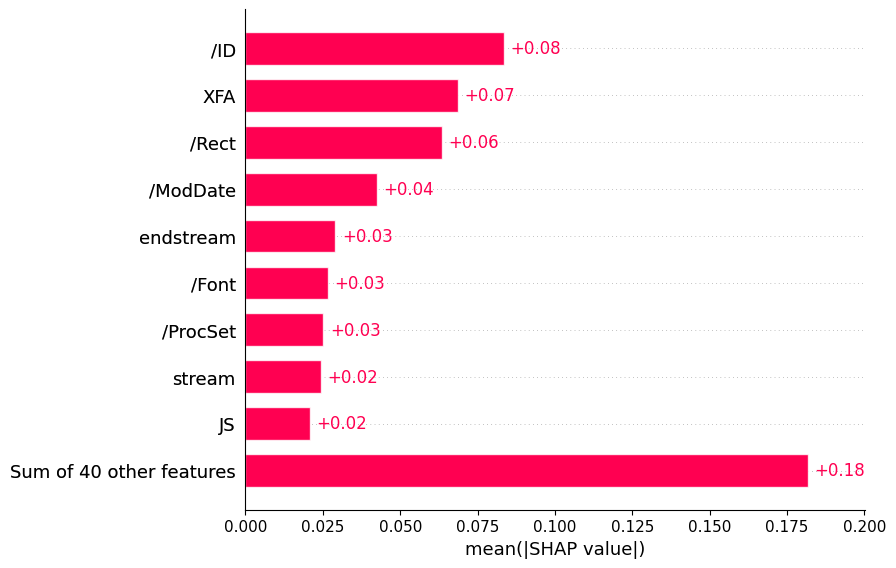

In [66]:
shap.plots.bar(shap_values_class_1)

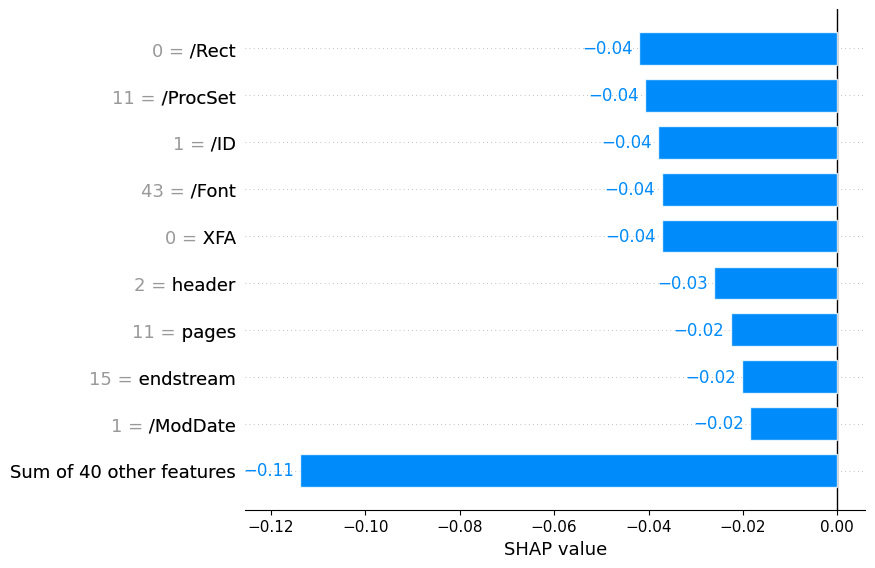

In [67]:
shap.plots.bar(shap_values_class_1[0])

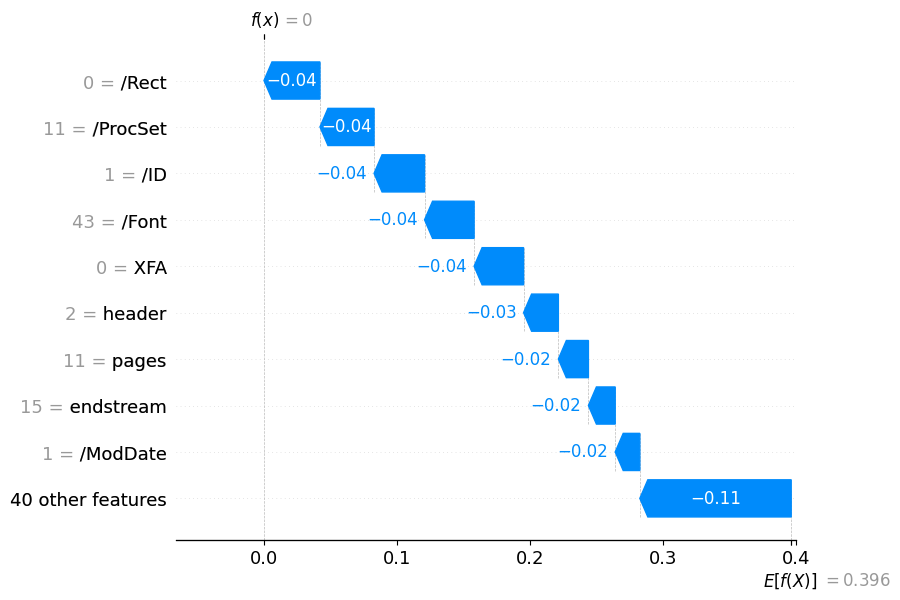

In [70]:
shap.plots.waterfall(shap_values_class_1[0])

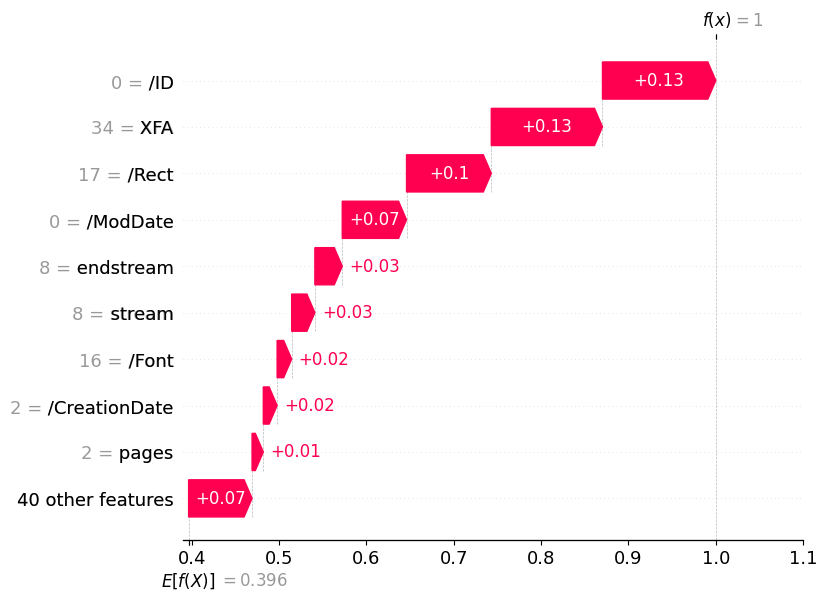

In [73]:
shap.plots.waterfall(shap_values_class_1[1])

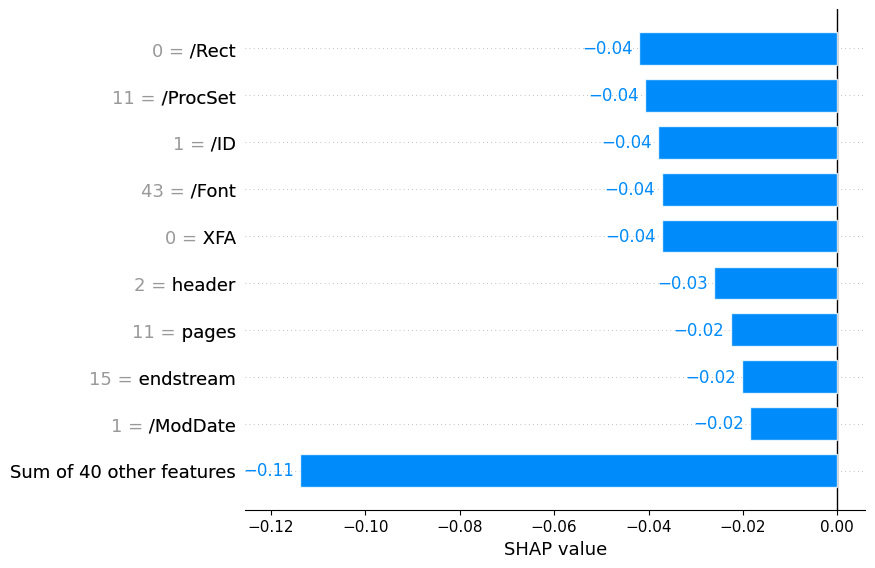

In [75]:
shap.plots.bar(shap_values_class_1[0])

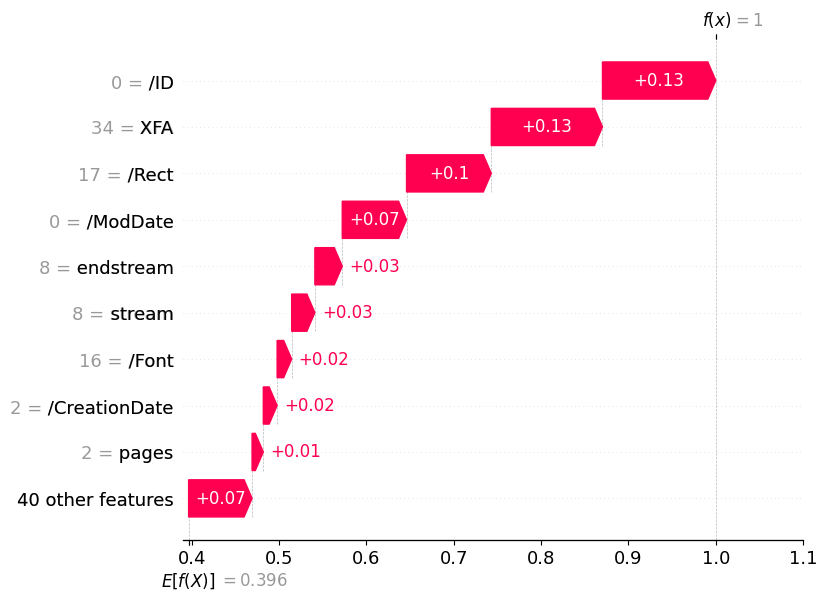

In [76]:
shap.plots.waterfall(shap_values_class_1[1])

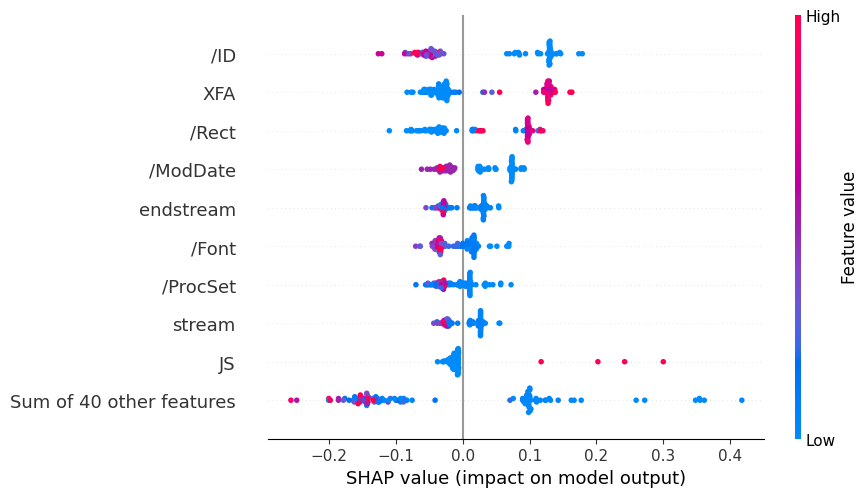

In [78]:
shap.plots.beeswarm(shap_values_class_1)

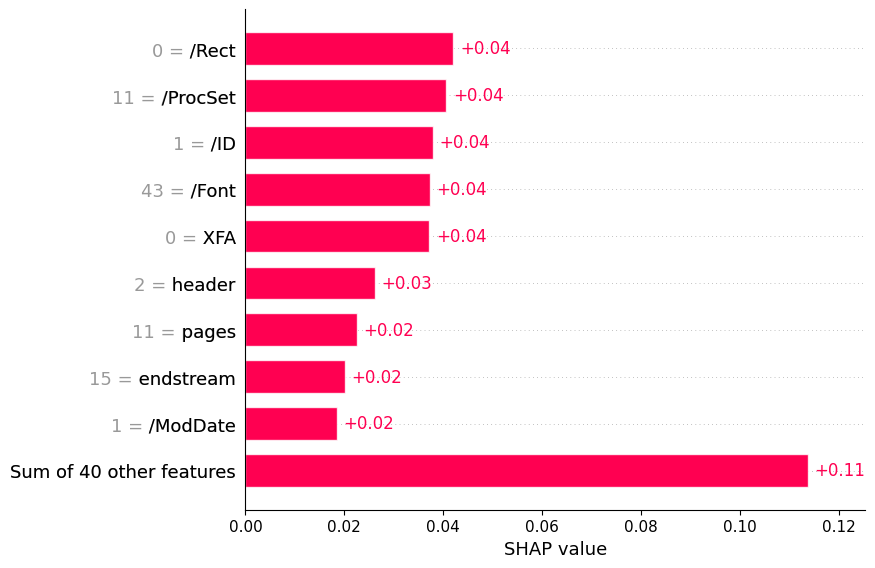

In [79]:
shap.plots.bar(shap_values[0,:,0])

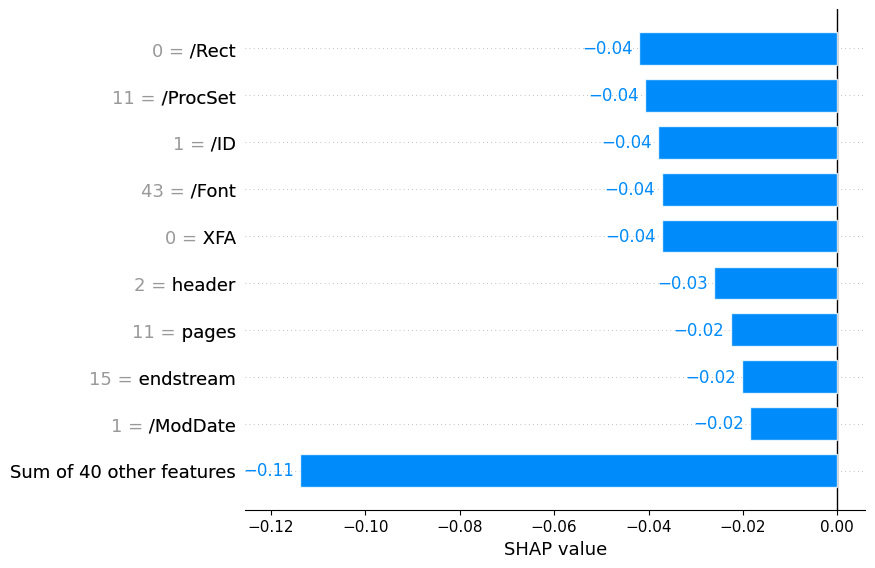

In [80]:
shap.plots.bar(shap_values[0,:,1])

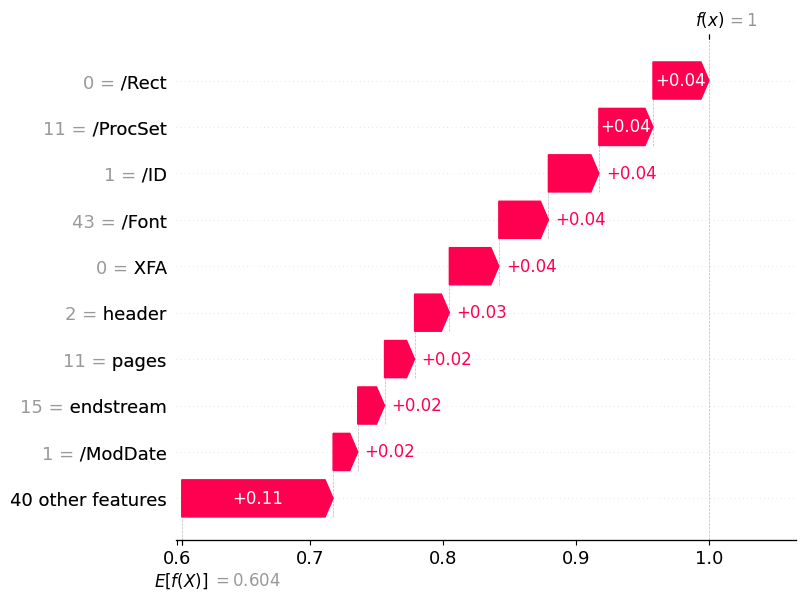

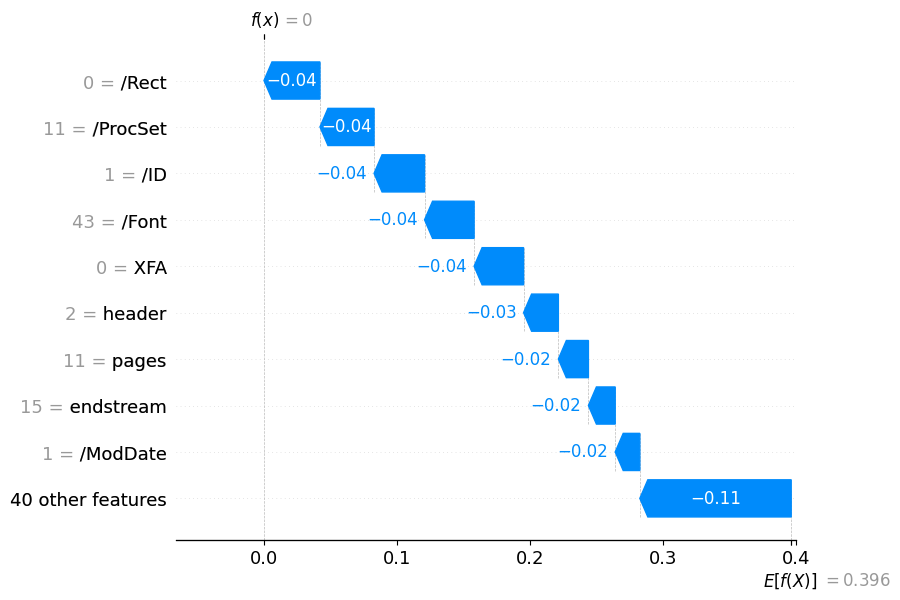

In [81]:
shap.plots.waterfall(shap_values[0,:,0])
shap.plots.waterfall(shap_values[0,:,1])

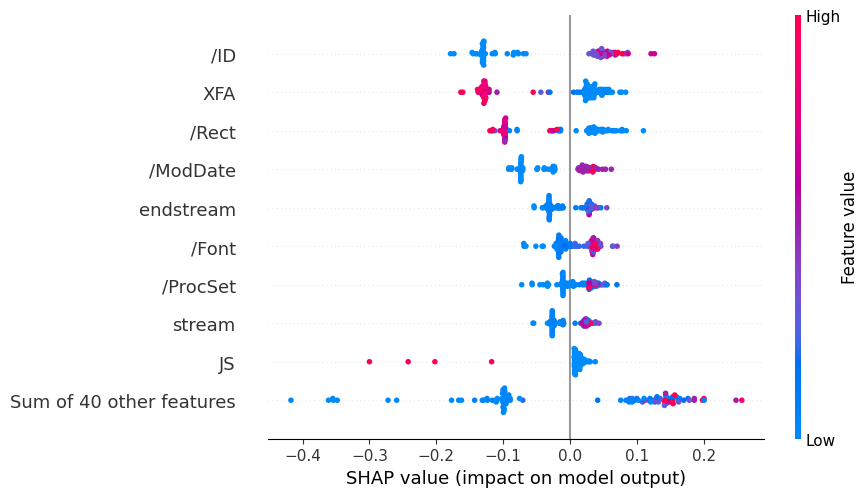

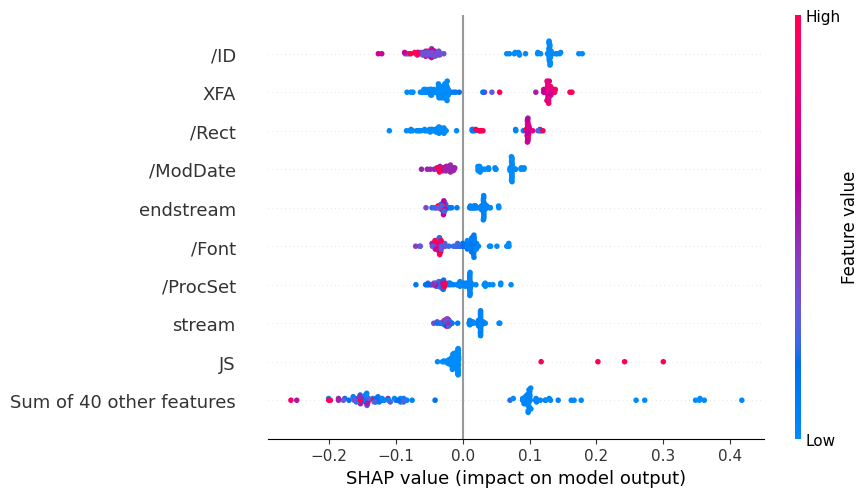

In [83]:
shap.plots.beeswarm(shap_values[:,:,0])
shap.plots.beeswarm(shap_values[:,:,1])

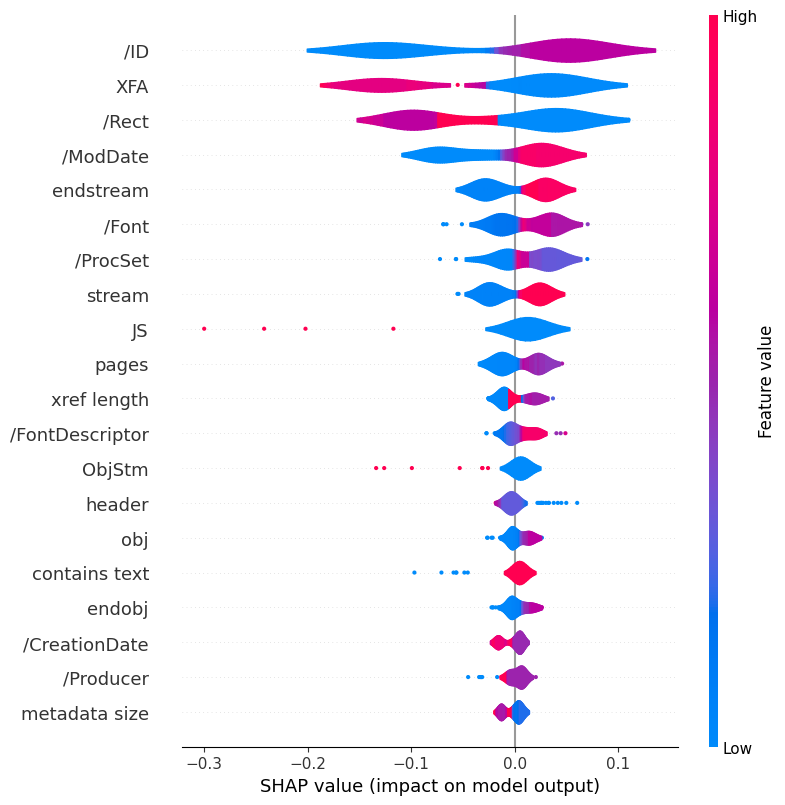

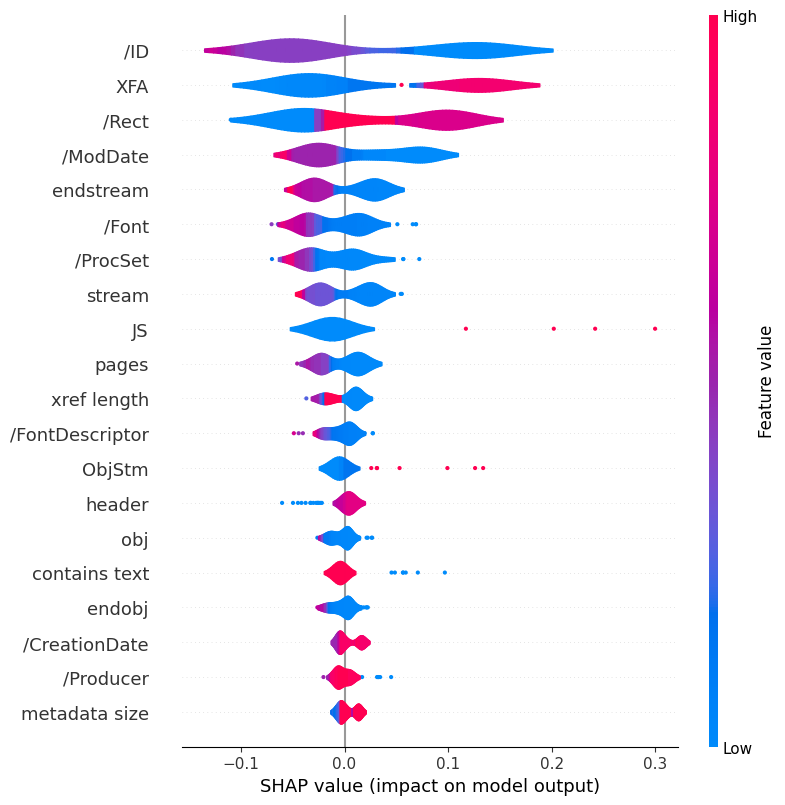

In [85]:
shap.plots.violin(shap_values[:,:,0])
shap.plots.violin(shap_values[:,:,1])

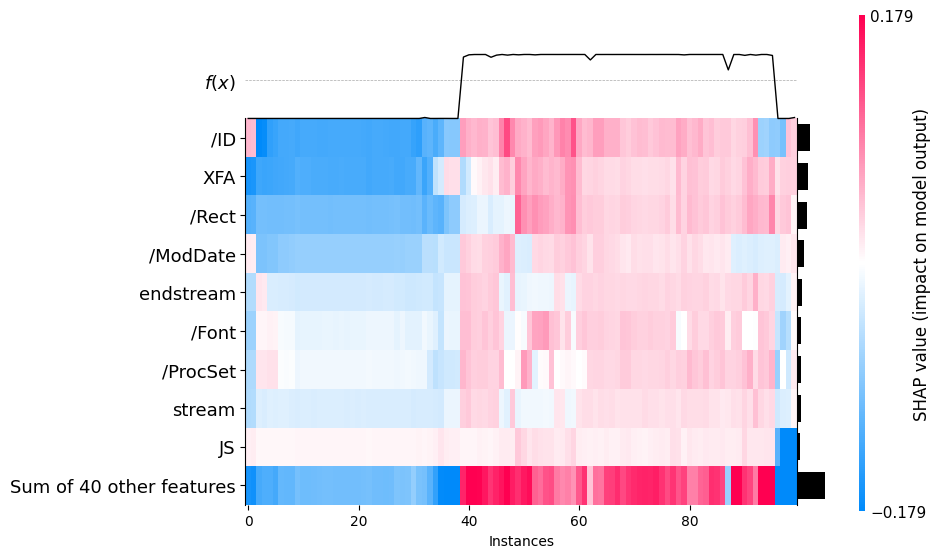

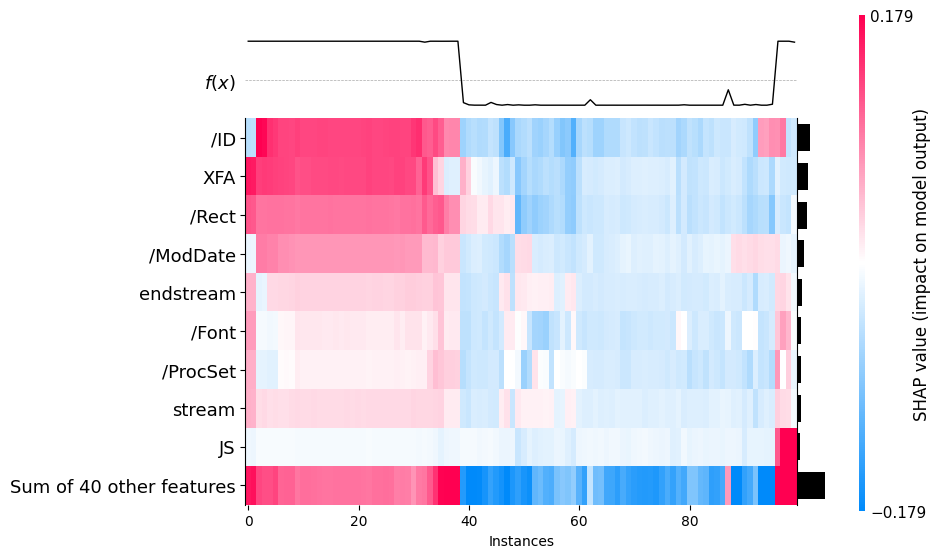

<Axes: xlabel='Instances'>

In [86]:
shap.plots.heatmap(shap_values[:,:,0])
shap.plots.heatmap(shap_values[:,:,1])